This Jupyter Notebook will be discussing 4 supervised Machine Learning Models used in Healthcare. 


Problem statement

Our methods

data used?

#### REGRESSION ALGORITHMS

###### Aim 

To predict the total expenditure in healthcare (HC.1 to HC.9) in the coming years in ireland using any of the Regression Algorithms

###### Data

The data used in this example is taken from data.gov.ie.

The Data is about the expenditure in Euro Millions of various sectors in healthcare, provided over past 10 years

Note : The data has many fields and we will be predicting only the expenditure in "All Current Health Care Expenditure (HC.1 to HC.9)" using its relation with "Year" 

###### SIMPLE  LINEAR  REGRESSION

What?
       
     Statisctical model used to undestand relationship between independent(x) and dependent variables(y) using 
       simple linear regression equation 
             y = mx + c
             
             m (Slope) = y2-y1 / x2-x1
             c = Coefficient of the line
                  
Why Linear Regression / When to choose?

     > Data is labelled
     > Data is numerical
     > Predict relation between a single X and Y . Polynomial Regression can also be used for this if we are 
       not able to find the line and can find a curve (See below)
    
Terms in regression?

      > Mean - Average of the data
      > Residual/Error(E) - Difference between the actual and predticed Y values.
      > E Square - Square of the residual/Error
      > The best fitting reegression line will have the least value of E Square
      > The distance between the line and the data can be minimized using various methods such as
        Sum of square errors, Root Mean Square error, Sum of absolute errors
      
How does it work?

      > Find the slope that best suits the train data
      > Use the Esquare of Root Mean Square to reduse the errors
      > Use the slope to predict the X value for the Y test data
 

In [256]:
#import all the libraries required
import matplotlib.pyplot as plt       #To plot the graph
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score  # To calculate the accuracy
from pylab import *
from scipy import stats 

In [257]:
#Load Data to the variable "df"
df = pd.read_csv("ExpenditureData.csv")
df.head(10)

,Year,All Current Health Care Expenditure (HC.1 to HC.9),Curative and Rehabilitative Care (HC.1+HC.2),Inpatient Curative & Rehabilitative Care (HC.1.1+HC.2.1),Day Curative and Rehabilitative Care (HC.1.2+HC.2.2),Outpatient Curative & Rehabilitative Care (HC.1.3+HC.2.3),Home-Based Curative & Rehabilitative Care (HC.1.4+HC.2.4),Long-Term Care (Health) (HC.3),Inpatient Long-Term Care (Health) (HC.3.1),Day Long-Term Care (Health) (HC.3.2),...,Immunisation Programmes (HC.6.2),Early Disease Detection Programmes (HC.6.3),Healthy Condition Monitoring Programmes (HC.6.4),"Epidemiological Surveillance, Disease Control Programmes (HC.6.5)",Preparing for Disaster and Emergency Response Programmes (HC.6.6),Preventative Care N.E.C,Governance and Health System Administration and Financing (HC.7),Govt Health Administration Agencies (HC.7.1),Administration of Health Financing (HC.7.2),Health Care Services N.E.C (HC.9)
0,2011,18281,9844,4449.0,1276.0,3540.0,579.0,4022,2473.0,176.0,...,51.0,66.0,207.0,83.0,2.0,66.0,378,144.0,234.0,140
1,2012,18701,9944,4495.0,1297.0,3533.0,618.0,4230,2661.0,170.0,...,50.0,64.0,200.0,80.0,2.0,66.0,428,148.0,280.0,152
2,2013,18505,9968,4409.0,1252.0,3663.0,644.0,4070,2483.0,167.0,...,44.0,61.0,193.0,82.0,2.0,75.0,492,174.0,318.0,143
3,2014,18850,10082,4591.0,1267.0,3543.0,681.0,4243,2564.0,170.0,...,43.0,62.0,183.0,76.0,2.0,82.0,630,182.0,447.0,151
4,2015,19232,10518,4805.0,1323.0,3680.0,709.0,4176,2538.0,178.0,...,47.0,61.0,178.0,75.0,2.0,81.0,563,179.0,384.0,161
5,2016,20143,11099,5078.0,1402.0,3964.0,655.0,4348,2601.0,189.0,...,42.0,62.0,189.0,79.0,NaN,82.0,551,185.0,367.0,171
6,2017,21259,11742,5339.0,1547.0,4153.0,703.0,4529,2620.0,194.0,...,53.0,68.0,195.0,82.0,NaN,85.0,628,199.0,428.0,203
7,2018,22452,12536,5720.0,1645.0,4458.0,712.0,4817,2748.0,210.0,...,45.0,77.0,203.0,80.0,2.0,92.0,628,248.0,380.0,192
8,2019,23754,13267,NaN,NaN,NaN,NaN,5115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,676,NaN,NaN,193


###### DATA PREPROCESSING

Text(0, 0.5, 'All Current Health Care Expenditure (HC.1 to HC.9) (In Euro Million)')

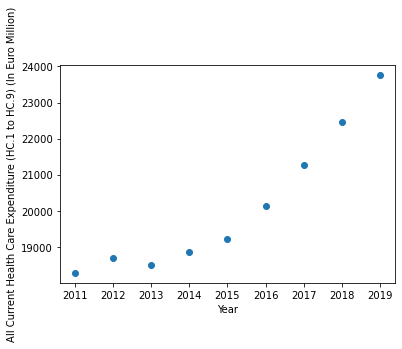

In [258]:
#Chosing 2 variables we want to find realtion between and then use the realtion to predict the value
#This 2 variables can be any 2 columns from the data frame
# We are choosing 'All Current Health Care Expenditure (HC.1 to HC.9)' as our dependant and "year" as independent variable

year = df['Year']
Expenditure = df['All Current Health Care Expenditure (HC.1 to HC.9)']


#Usually for a lager dataset, the data is split to train and test sets at this point
#The train set is used to train the model and test is used to test the accuracy.
#However, we have a very small dataset here of 9 rows and hence splitting it further won't be a good approach.
#Because after the split eventhough the model might show higher accuracy in training, the test accuracy can be slow due to lack of enough training data
#Splitting with Test and Train data approach is used in the Classification model (See Below)

#scatter the training data to the plot
scatter(year ,Expenditure)

# Adding labels
plt.xlabel("Year")
plt.ylabel("All Current Health Care Expenditure (HC.1 to HC.9) (In Euro Million)")

###### IMPLEMENTING LINEAR REGRESSION

In [259]:
#Finding the characteristics needed to plot the regression line that lies closer to the data set
# This is done using the "stats" module provided by "Scipy" library 

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'] , df['All Current Health Care Expenditure (HC.1 to HC.9)'])

#Slope is the steepness of a line
#Intercept is the location where it intersects an axis
#r_value is the correlation coefficient between the actual y and predicted y value
#p_value is the probability that the null hypothesis is true

print("Slope of the regression line : " , slope );
print("Intercept of the regression line : " , intercept );
print("Correlation coefficient or rvalue : " , r_value );
print("pvalue : " , p_value );
print("Standard error of the estimated gradient. : " , std_err );

Slope of the regression line :  665.7666666666668
Intercept of the regression line :  -1321389.0555555557
Correlation coefficient or rvalue :  0.9361511512965179
pvalue :  0.0002033765865279042
Standard error of the estimated gradient. :  94.50901051636862


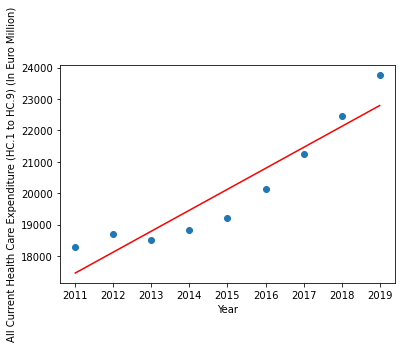

In [260]:
#Adding labels and plotting the datasets

plt.xlabel("Year")
plt.ylabel("All Current Health Care Expenditure (HC.1 to HC.9) (In Euro Million)")
plt.scatter(year, Expenditure)

#put the prediction equation in a method for clean coding pratcises
def predict(year):
    return slope*year + intercept


#call the predict method so it return the line closely fitting to the years after calculating through the equation
fitline = predict(year) 

# the Line is drawn with color(c) 'red' 
plt.plot(year, fitline, c='r')

# printing the graph
plt.show()

Observation : The line is not covering all the points, but let us try predicting first 

In [261]:
#Predicting the expenditure in Euro Millions for all the Healthcare sector in the year 2018 & 2019
print ("The total expenditure for all the health sector in the year of 2018 might be",predict(2018),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2019 might be",predict(2019),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2020 might be",predict(2020),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2021 might be",predict(2021),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2022 might be",predict(2022),"Euro Millions Approx") 

The total expenditure for all the health sector in the year of 2018 might be 22128.0777777778 Euro Millions Approx
The total expenditure for all the health sector in the year of 2019 might be 22793.844444444403 Euro Millions Approx
The total expenditure for all the health sector in the year of 2020 might be 23459.61111111124 Euro Millions Approx
The total expenditure for all the health sector in the year of 2021 might be 24125.377777777845 Euro Millions Approx
The total expenditure for all the health sector in the year of 2022 might be 24791.14444444445 Euro Millions Approx


In [262]:
#Finding the R-Squared value from the correlation coefficient (see above code)
#This will indicate the accuracy of any regression model. This ranges from 0 to 1 which can be stated as 0% to 100%
#The below equation 

r_value ** 2


0.8763789780737961

Observation : Linear Regression on our data shows that it will predict the expenditure of all the sectors in healthcare in Ireland 87.6% accurately. This is a good model. Let us apply Polynomial regression and check if we can achieve higher accuracy without overfitting

###### POLYNOMIAL REGRESSION  


What?
     
    > Polynomial regression is a model which uses a non-linear relationship between the independent and dependent variables
      to predict the target variable
    
Why / When to choose?

    > This is also a regression  model and should be chosen if data is numerical
    > The correlation between the variables are not always linear, to handle these cases we use polynomials 
      to represent the realtions
    
       Note: Polynomial Regression uses the same terms and math like linear regression 


In [263]:

#funtion for finding the polynomial equation 
# 1 indicates the degree of the eqution

p2 = np.poly1d(np.polyfit(year, Expenditure, 1))
r2 = r2_score(Expenditure,p2(year))
print("R2 vlaue for Polynomial Function with degree 1 : " , r2)

p2 = np.poly1d(np.polyfit(year, Expenditure, 2))
r2 = r2_score(Expenditure,p2(year))
print("R2 vlaue for Polynomial Function with degree 2 : " , r2)

p2 = np.poly1d(np.polyfit(year, Expenditure, 3))
r2 = r2_score(Expenditure,p2(year))
print("R2 vlaue for Polynomial Function with degree 3 : " , r2)

p2 = np.poly1d(np.polyfit(year, Expenditure, 4))
r2 = r2_score(Expenditure,p2(year))
print("R2 vlaue for Polynomial Function with degree 4 : " , r2)



R2 vlaue for Polynomial Function with degree 1 :  0.8763789780737961
R2 vlaue for Polynomial Function with degree 2 :  0.9938777763571148
R2 vlaue for Polynomial Function with degree 3 :  0.9941627534384906
R2 vlaue for Polynomial Function with degree 4 :  0.99838377886423


Observation : The improvement we achieve by increasing the degree of the polynomial from 2 and above do not yeild much improvement in r2 score.
Hence the Polynomial degree = 2 will be set for this dataset

The polynomial equation is:        2
107.6 x - 4.329e+05 x + 4.355e+08


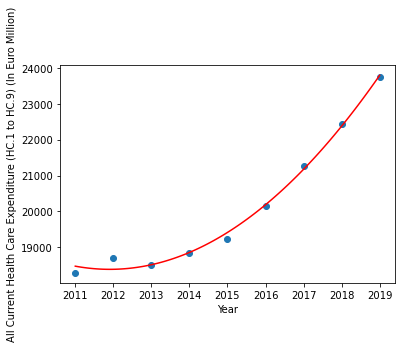

In [264]:

p2 = np.poly1d(np.polyfit(year,Expenditure,2))
print ("The polynomial equation is:",p2)

#Finding th correct linespace for 'X'
xp = np.linspace(2011, 2019, 100)

plt.scatter(year,Expenditure)
plt.xlabel("Year")
plt.ylabel("All Current Health Care Expenditure (HC.1 to HC.9) (In Euro Million)")

#The Line is drawn
#plot the training set
plt.plot(xp,p2(xp), c='r')

# printing the graph
plt.show()

In [265]:
#Predicting the expenditure in Euro Millions for all the Healthcare sector in the year 2018 & 2019
print ("The total expenditure for all the health sector in the year of 2018 might be",p2(2018),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2019 might be",p2(2019),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2020 might be",p2(2020),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2021 might be",p2(2021),"Euro Millions Approx") 
print ("The total expenditure for all the health sector in the year of 2022 might be",p2(2022),"Euro Millions Approx") 

The total expenditure for all the health sector in the year of 2018 might be 22379.133333027363 Euro Millions Approx
The total expenditure for all the health sector in the year of 2019 might be 23798.066666305065 Euro Millions Approx
The total expenditure for all the health sector in the year of 2020 might be 25432.190475702286 Euro Millions Approx
The total expenditure for all the health sector in the year of 2021 might be 27281.50476127863 Euro Millions Approx
The total expenditure for all the health sector in the year of 2022 might be 29346.009523034096 Euro Millions Approx


In [266]:
#Finding the R-Squared value from the correlation coefficient (see above code)
#This will indicate the accuracy of any regression model. This ranges from 0 to 1 which can be stated as 0% to 100%
#The below equation 

r2 = r2_score(Expenditure,p2(year))
r2

0.9938777763571148

Observation : Even though the polynomial equation with degree 2 gives the best accuracy of 99.3% 
    it is not the perfect fit for our data.
    This is beacuse of 2 reasons, we have a very few data set and hence the model is not trained effectively.
    Also 99% of accuracy clearly shows that it is an overfit for any of the ML models

Conclusion: The expenditure of the coming years for All the healthsectors together can be found using the 
            linear regression model
            This model has 87.63% accuracy.
            Polynomial regression is an overfit on this data set.
    

#### CLASSIFICATION ALGORITHMS

###### Aim

We will be implementing both KNN and Decision Tree classification Algorithms to predict the case Type data set. 

###### Data

The data used in this example is taken from data.gov.ie.

Data set used is the data of patients in the Endocronolgy department of Ireland East Hospital Group within the speciality of General Medicine and General Science. 

Note : The data has many fields and we will be predicting only the CaseType in General Science and General Medicie department using its relation with "Year" 




###### K-NEAREST NEIGHBORS (KNN)

What?

    kNN is one of the simplest supervised classification Algorithms. It Works on the basis of feature similarity and 
    calculating the nearest neighbor using the Euclidean distance
      
Why KNN / When to choose?

     > Data is labelled
     > Data is noise free (not much variety of data)
     > Small dataset
    
Terms?

      > The data point to be classified will be voted majority by its K nearest neighbors. 
        Meaning that the data point will be classfied in to the class with the highest vote. 
      > 'K' is chosen via parameter tuning as this plays a crucial role in the accuracy of the algorithm. 
        if the 'K' is too low it can be a biased answer/prediction. If 'K' is too high we can have performance issues.
      > The most common way to choose 'K' is to take the Square root of 'n', 'n' being the total number of data points. 
        If even round to odd (+/- 1)
      > Euclidean Distance
          Distance between 2 points(a,b) in an xy plane can be calculated as
                D = SquareRoot ((x-a)^2 + (y-b)^2)
          
How does it work?

     > Cacluate the distance to each data point from our data point we want to predict using Euclidean Distance
     > Find the 'k' nearest neighbors or 'K' data points with the least Euclidean Distance
     > check what class does those 'k' neighbors fall into
     > Take the majority of the class among those neighbors (thats why we need 'k' as odd, so that we have 
       a majority after vote, to avoid a tie)
     > Result : Our data point falls into the majority class, as its nearest neighbors fall in to that class.
 


In [267]:
import pandas as pd
import io
import numpy as np
import math
from sklearn.model_selection import train_test_split  #Used to split dataset to test and train
from sklearn.preprocessing import StandardScaler      #Used to scale the dataset between -1 and 1
from sklearn.neighbors import KNeighborsClassifier    #Classifier to find the k-nearest neighbors
from sklearn.metrics import confusion_matrix          #Performance measurement for 2 or more class problems
from sklearn.metrics import accuracy_score            #Find accuracy of the Algorithm
from sklearn.metrics import f1_score                  #Find the accuracy of the Algorithm considering the false positives and false negatives also

###### DATA PREPROCESSING :
    

This same dataset is going to be used for both KNN and Decision Tree

In [268]:
#Read data from csv as "DataFrame" using pandas
df = pd.read_csv("Filtered Endocronolgy.csv")
df.head()

,Archive Date,Hospital Group,Hospital HIPE,Hospital Name,Specialty HIPE,SpecialtyName,AgeProfile,AdultOrChild,CaseType,WL Type,Time Bands,Total
0,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,GeneralSurgery,16-64,Adult,DayCase,GI Scope,0-3 Months,135
1,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,GeneralSurgery,65+,Adult,DayCase,GI Scope,0-3 Months,31
2,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,GeneralSurgery,65+,Adult,DayCase,GI Scope,3-6 Months,13
3,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,GeneralSurgery,65+,Adult,DayCase,GI Scope,6-9 Months,21
4,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,GeneralSurgery,65+,Adult,DayCase,GI Scope,9-12 Months,25


In [269]:
#We will be taking "SpecialtyName', 'AgeProfile','Adult/Child' an 'Age' as our features
#Mapping the string values of each feature and final result into numeric values for computation.
#Later assigning them back to the same column of the DataFrame

Case_Type = {'DayCase': 1, 'Inpatient': 2} 
df['CaseType'] = df['CaseType'].map(Case_Type)

Category = {'GeneralSurgery': 1, 'GeneralMedicine': 2} 
df['SpecialtyName'] = df['SpecialtyName'].map(Category)

Age = {'0-15': 1, '16-64': 2, '65+': 3} 
df['AgeProfile'] = df['AgeProfile'].map(Age)

Adult_Child = {'Adult': 1, 'Child': 2} 
df['AdultOrChild'] = df['AdultOrChild'].map(Adult_Child)

#printing the head to check if the numeric values are mapped.
df.head()


,Archive Date,Hospital Group,Hospital HIPE,Hospital Name,Specialty HIPE,SpecialtyName,AgeProfile,AdultOrChild,CaseType,WL Type,Time Bands,Total
0,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,1,2,1,1,GI Scope,0-3 Months,135
1,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,1,3,1,1,GI Scope,0-3 Months,31
2,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,1,3,1,1,GI Scope,3-6 Months,13
3,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,1,3,1,1,GI Scope,6-9 Months,21
4,24/09/2020,Dublin Midlands Hospital Group,102,Naas General Hospital,2600,1,3,1,1,GI Scope,9-12 Months,25


In [270]:
#It is important to remove non-numeric data from the feature set 
#In this case having a Zero in any feature will not make sense as speciality type, age profile,adult/child or case type can't be 0

#The below 4 features are taken here for prediction 
dfSliced = df.loc[:,('SpecialtyName','AgeProfile','AdultOrChild','CaseType')]

#The column in which Zero should be removed
Zeros_to_be_removed = ['SpecialtyName' ,'AgeProfile','AdultOrChild']

#Finds 0 and replace it with 'nan' - not a number in each of the feature column and then replacing it with the mean 
#it is replaced with mean than rather deleting,because that way we can still use the data as using mean wont change the data much

for column in Zeros_to_be_removed:
  dfSliced[column] = dfSliced[column].replace(0,np.nan)
  mean_of_data = int(dfSliced[column].mean(skipna = True))
  dfSliced[column] = dfSliced[column].replace(np.nan,mean_of_data)

In [271]:
#X denotes the feature set ie; columns 1 to 3
#Y denotes the target/result/class ie; column 3 . In our case the "CaseType"

X = dfSliced.iloc[:,0:3]
y = dfSliced.iloc[:,3]

#Using the train_test_split function proviede by Skylearn to split the DF determenistic using the seed eachtime
#the program runs (random_state = int) with 20% of the data as test data (p=0.2)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state =0, test_size = 0.2)


In [272]:
#Scaling the DF to be normalised within the range -1 and 1 using the StandardScaler.
#This is done by substracting the mean and then scaling it to unit variance

Scaler = StandardScaler()

#Find the scaling parameters from the X_train and fit it to transfrom the X_train
#Use that parameteres to scale  X_test 
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform (X_test)

##### DATA PREPROCESSING ENDS 

###### Implementing KNN - 
Calculating K and then creating, training the calssifier and
using the calssifier to predict 

In [273]:
#Find the 'K' value as discussed with the Square Root of the length of the dataset
#Round it to +/- 1 if even. 
#We are rounding to 11

math.sqrt(len(Y_test))

10.723805294763608

In [274]:
#Applying the KNeighbor classifier from SKlearn with 'K' as 11, p=2 (we have 2 target classes, metric as euclidean)
classifier = KNeighborsClassifier(n_neighbors= 11,p=2,metric='euclidean')

In [275]:
#Train the classifier with our train data
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [276]:
#Using the predict method of the classifier to predict the calss of X_test of our DF

YPredict = classifier.predict(X_test)
print (YPredict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [277]:
#Using confusion metrics to take the count of false positives, false negatives, true positives and false negatives
#True positive = We predicted positive and its true
#True negative = we predicted negative and its true
#False negative = we predicted False and its false
#True negative = we predicte True and is True

#Since we are taking our test and train set randomly everytime the confusion matrix value will be also different,but will be similar
confusion = confusion_matrix(Y_test,YPredict)
print (confusion)


[[99  0]
 [16  0]]


In [278]:
# Normally the accuracy of a classification Algorithm cant be deciced with accuracy score.
#Either use Confusion matrix or F1_score to find the accuracy of classification models

print(f1_score(Y_test,YPredict))

0.9252336448598132


Observation : KNN is approx. 93% accurate. 
This means that KNN correctly classified 93% of the ClassType of the patients in the Endocronolgy Department of Ireland East Hospital Group 
within the speciality of General Medicine and General Science, when run on the test data the rest 7 % of the time the Algorithm predicted wrong. 
Still 93% is quite good for such a small dataset using KNN

###### DECISION TREE

What?

    > Decision Tree is a supervised classification method used using a tree structure with the basis of entropy and 
      information gain and CART(Classification and Regression Tree) algorithm
    > It can be both used for regression and calssification. We will be using for classification
      
Why Decision Tree / When to choose?

     > Data is labelled
     > When the feature is really important to take a decision
     > Understand why one feature is important than the other
     > Non-linear parameters doesnt effect the decision
    
Terms?

      > Root Node - Top most node from which the tree starts
      > Decision Node - Node that has 2 or more branches
      > Leaf node - Final node / Decision.
      > Entropy/ Gini - Measure of randomness or unpredictness in a dataset.
           The entropy should be reduced and should be 0 if possible when we reach the leaf node.
            Entropy = P * log (p) added over all the data points
      > Information Gain- Measure of reduction of entropy after the data set is split.
           Higher the information gain higher the Entropy loss
           Always aim at high Information Gain while asking a question 
              
How does it work?

      > Build the tree by asking the question with high Information Gain
      > Split the dataset with Yes/No to that question
      > Ask the next question with high information Gain
      > Repeat this until we get required leaf nodes
      > Once the tree is build, the input testdata is traveresed through the same tree to predict the results
      

###### Implementing Decision Tree

In [279]:
from sklearn import tree

In [280]:
#Define the features needed to ask the question

features = list(dfSliced[['SpecialtyName','AgeProfile','AdultOrChild']])
print(features)

['SpecialtyName', 'AgeProfile', 'AdultOrChild']


In [286]:
#Using the Decision Tree classifier with criteria entropy, depth =3, leaf number = 5
clf_entropy = tree.DecisionTreeClassifier(criterion ='entropy',max_depth =3, min_samples_leaf =5) 
clf = clf_entropy.fit(X_train,Y_train)

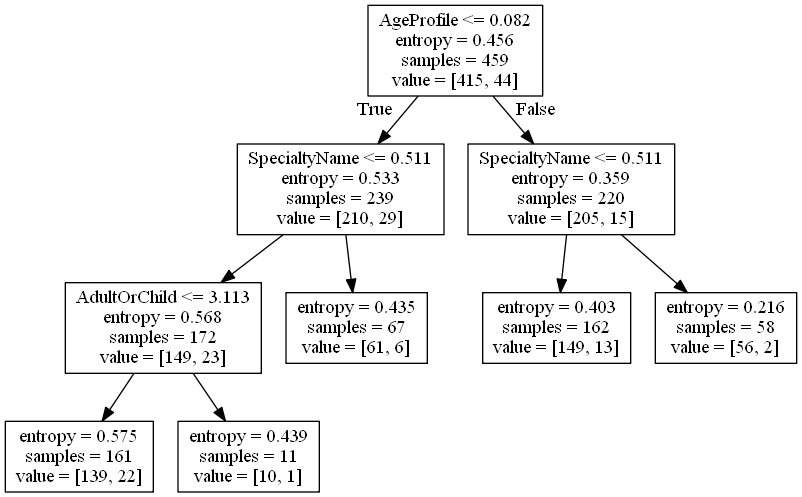

In [287]:
import sys
sys.modules['sklearn.externals.six'] = six
import pydot
import graphviz  #used to visualise the tree
from IPython.display import Image  
 
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  #load the out file and feature names into graphviz function

#pydot helps to process, create and modify graphs in Graphviz's dot language.
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())  


Observation : Decision Tree is taking the AgeProfile as the first feature because it has the highest information Gain value. The tree is split to 2 on th left with AgeProfile<=0.082 and on right with AgeProfile>0.082. 
The next factor is Speciality Name, followed by "Adult/Child" feature.
We have 5 leaf nodes with the least information gain values

In [283]:
#Predicting the decision using the predict function on the test data
Ypredict = clf_entropy.predict(X_test)
print (YPredict)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [284]:
confusion = confusion_matrix(Y_test,YPredict)
print (confusion)

[[99  0]
 [16  0]]


In [285]:
#Calculate the F1Score like we did for KNN
print(f1_score(Y_test,YPredict))

0.9252336448598132


Observation : Decision Tree is approx. 93% accurate. 
This means that Decision correctly classified 93% of the ClassType of the patients in the Endocronolgy Department of Ireland East Hospital Group 
within the speciality of General Medicine and General Science, when run on the test data the rest 7 % of the time the Algorithm predicted wrong. 
Still 93% is quite good for such a small dataset using Decision Tree

Conclusion : Both the classifying algorithms are giving an F1 score of 93% which means that both can be used to calssify the data and 